<a href="https://colab.research.google.com/github/CMunoz-28/Marketing-Analytics-CSUEastBay/blob/main/Stukent_OptimizeforClicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Marketing Analytics & Statistical Analysis

##Exploratory Data Analysis (EDA) - BUHI Supply Co.

###Perform Exploratory Data Analysis on dataset "Optimize for Clicks"

####Dataset: Provided by [Stukent](https://www.stukent.com/) | Digital Marketing Analytics Simternship


###Objectives
Our primary goal is to maximize the number of clicks across all campaigns using a total budget of $20,000, ensuring funds are allocated strategically based on Cost Per Click (CPC) and other campaign constraints.


####Analyze Historical Data:

* Understand campaign performance trends across key metrics like clicks, impressions, CPC, and cost.

* Identify top-performing campaigns in terms of both efficiency (low CPC) and effectiveness (high clicks).
Budget Allocation Strategy:

* Strategically allocate a $20,000 budget to campaigns to maximize clicks.

####Constraints:
* No more than $3,000 allocated to any single campaign.
Consider each campaign’s recommended budget max.
Forecast Performance:

* Use CPC metrics to predict outcomes from allocated budgets.
* Prioritize campaigns that offer the most cost-effective clicks.

#Libraries, Directory, Data

By exploring the data, our data consists of one .csv file containing the following features:

* Campaign
* Campaign Type
* Source (Paid, Owned, Earned Media)
* Clicks
* Impressions
* Cost
* Click-Through-Rate (CTR)
* Input Budget
* Recommended Budget Max

In [ ]:
#Change the Directory
%cd /content/drive/MyDrive/Assignments

/content/drive/MyDrive/Assignments


In [ ]:
#Install needed libraries
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
!pip install seaborn
!pip install plotly
!install ace_tools

install: missing destination file operand after 'ace_tools'
Try 'install --help' for more information.


In [ ]:
#Load the data
clicks_df = pd.read_csv('Optimize_for_Clicks.csv')
clicks_df.head()

,Campaign Type,Source,Campaign,Input Budget,Impressions,CTR,Clicks,Cost,Recommended Budget Max
0,Affiliate,Clickbank,Tote,112,2811,0.01,24,104,2657.0
1,Affiliate,Clickbank,Satchel,108,2513,0.01,28,98,1489.0
2,Affiliate,Clickbank,Purse,126,3486,0.01,32,122,1646.0
3,Affiliate,Shareasale,Purse,151,5560,0.01,37,139,460.0
4,Display,Retargeting,Yellow Backpack,295,35750,0.00,39,286,782.0


#Check for missing data

In [ ]:
clicks_df.isnull().sum()

,0
Campaign Type,0
Source,0
Campaign,0
Input Budget,0
Impressions,0
CTR,0
Clicks,0
Cost,0
Recommended Budget Max,0


#Describe the Data

In [ ]:
clicks_df.describe()

,Input Budget,Impressions,CTR,Cost,Recommended Budget Max
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,221.283333,35255.066667,0.010250,210.516667,1664.516667
std,65.365576,64338.268411,0.007499,63.029003,837.843621
min,102.000000,2513.000000,0.000000,95.000000,331.000000
25%,166.250000,6227.000000,0.010000,158.500000,830.250000
50%,226.000000,9131.000000,0.010000,219.000000,1713.000000
75%,291.000000,27197.250000,0.010000,274.250000,2476.750000
max,300.000000,289000.000000,0.030000,298.000000,2989.000000


In [ ]:
clicks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign Type           120 non-null    object 
 1   Source                  120 non-null    object 
 2   Campaign                120 non-null    object 
 3   Input Budget            120 non-null    int64  
 4   Impressions             120 non-null    int64  
 5   CTR                     120 non-null    float64
 6   Clicks                  120 non-null    object 
 7   Cost                    120 non-null    int64  
 8   Recommended Budget Max  120 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 8.6+ KB


In [ ]:
clicks_df.dtypes

,0
Campaign Type,object
Source,object
Campaign,object
Input Budget,int64
Impressions,int64
CTR,float64
Clicks,object
Cost,int64
Recommended Budget Max,float64


In [ ]:
clicks_df.shape

(120, 9)

#Outliers

Impressions: 


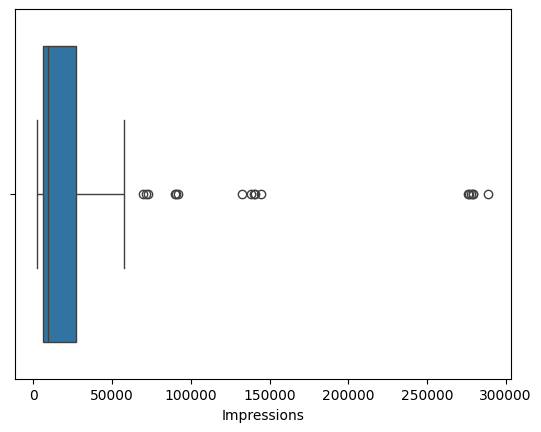

Clicks: 


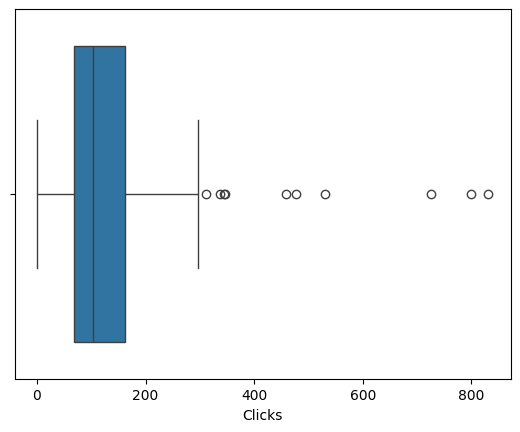

In [ ]:
list1 = ['Impressions', 'Clicks']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=clicks_df[str(i)])
    plt.show()

#Handle Outliers

In [ ]:
lower_clicks = clicks_df[clicks_df['Impressions'] < clicks_df['CTR'].quantile(0.01)]
higher_clicks = clicks_df[clicks_df['Clicks'] < clicks_df['CTR'].quantile(0.99)]

#Data Analysis


* Identified campaigns with the highest and lowest performance based on clicks and impressions.
* Calculated CPC for each campaign and highlighted those with the lowest CPC for strategic allocation.
* Forecasted potential performance for specific campaigns like "Display / YouTube / Tote" under varying budgets.

In [ ]:
# Calculating the average clicks and impressions across all campaigns
average_clicks = clicks_df['Clicks'].mean()
average_impressions = clicks_df['Impressions'].mean()

average_clicks, average_impressions

(164.59166666666667, 35255.066666666666)

In [ ]:
# Calculating the average clicks and impressions grouped by 'Campaign Type'
campaign_type_breakdown = clicks_df.groupby('Campaign Type')[['Clicks', 'Impressions']].mean()
campaign_type_breakdown

,Clicks,Impressions
Campaign Type,,
Affiliate,96.933333,8727.666667
Display,326.600000,114493.700000
Paid Search,129.050000,5444.850000
Paid Social,111.600000,10626.750000


In [ ]:
# Identifying the campaign with the lowest number of clicks
bottom_campaign = clicks_df.loc[clicks_df['Clicks'].idxmin(), ['Campaign', 'Clicks', 'Impressions']]
bottom_campaign

,0
Campaign,Tote
Clicks,24
Impressions,2811


In [ ]:
# Calculate the total cost and total clicks to determine the overall CPC
total_cost = clicks_df['Cost'].sum()
total_clicks = clicks_df['Clicks'].sum()

# Calculate the cost per click (CPC)
overall_cpc = total_cost / total_clicks
overall_cpc

1.2790238468938282

Budget Allocation Insights:

Ranked campaigns by CPC to pinpoint the most cost-effective opportunities.
Created an allocation model that prioritizes campaigns where $3,000 could deliver the highest estimated clicks.

#Vislualization

##Top 10 Campaigns with the most Clicks

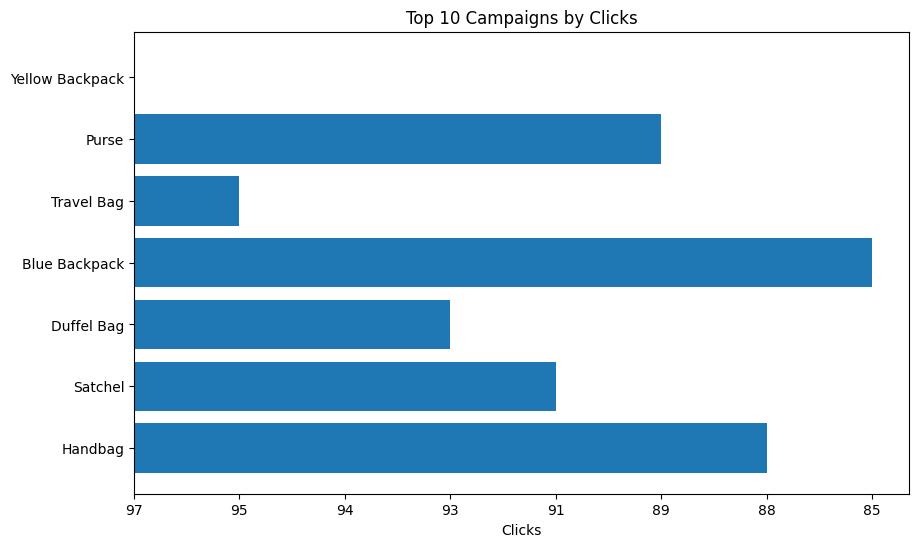

In [ ]:
# Sort the data by 'Clicks' to get the top 10 campaigns with the most clicks
top_10_campaigns_clicks = clicks_df.sort_values(by='Clicks', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(top_10_campaigns_clicks['Campaign'], top_10_campaigns_clicks['Clicks'])
plt.xlabel('Clicks')
plt.title('Top 10 Campaigns by Clicks')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest clicks at the top
plt.show()


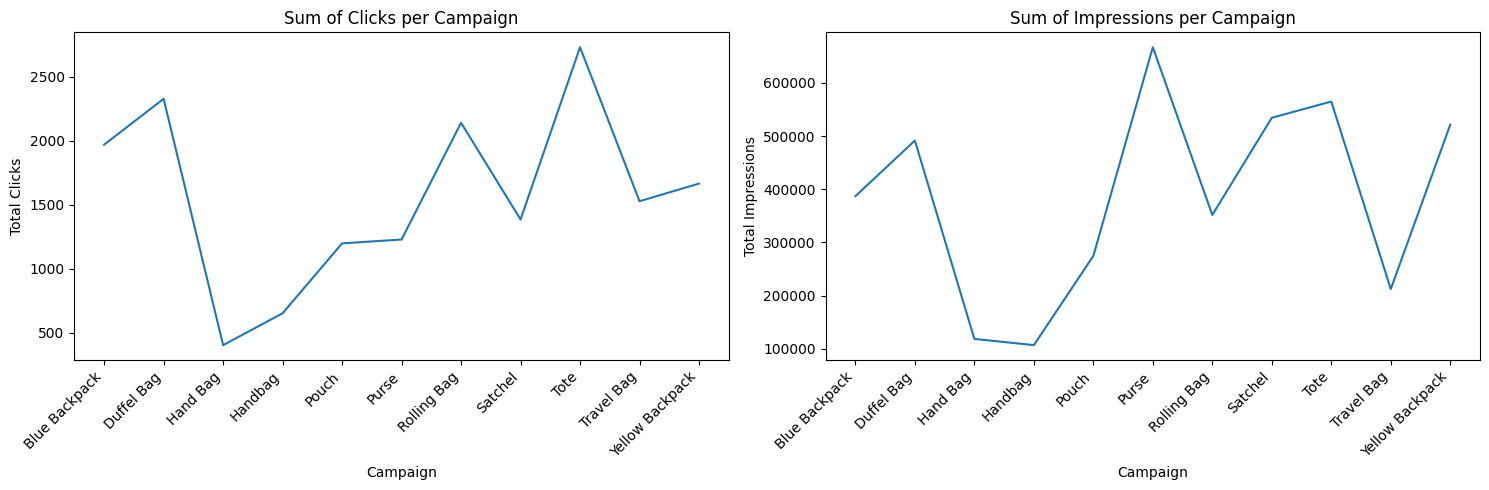

In [ ]:
# Sum of clicks & Sum of impressions

# Convert the 'Clicks' column to numeric, handling commas as thousand separators
clicks_df['Clicks'] = pd.to_numeric(clicks_df['Clicks'].str.replace(',', '.'), errors='coerce')

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Line chart for sum of clicks
axs[0].plot(clicks_df.groupby('Campaign')['Clicks'].sum())
axs[0].set_title('Sum of Clicks per Campaign')
axs[0].set_xlabel('Campaign')
axs[0].set_ylabel('Total Clicks')

# Line chart for sum of impressions
# Assuming 'Impressions' is already numeric, if not, apply similar conversion as for 'Clicks'
axs[1].plot(clicks_df.groupby('Campaign')['Impressions'].sum())
axs[1].set_title('Sum of Impressions per Campaign')
axs[1].set_xlabel('Campaign')
axs[1].set_ylabel('Total Impressions')

# Rotate x-axis labels for better readability (optional)
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

#Long-term goals:
Optimal Allocation of $20,000:

* Ensure that every dollar is allocated strategically to maximize clicks while adhering to the constraints.
Allocate funds to campaigns with the lowest CPC until the total budget is exhausted or allocation caps are met.
Continuous Monitoring and Adjustment:

* Monitor the performance of allocated funds in real-time.
Reallocate remaining budgets if certain campaigns fail to deliver the expected performance.
Long-Term Strategy:

* Use insights from this allocation round to guide future funding decisions.
Incorporate learnings into optimizing campaigns with higher CPC but broader audience reach for subsequent rounds.
